<a href="https://colab.research.google.com/github/Pulkit287/IDS-Project/blob/master/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing Dataset

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import os.path
import random


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Downloading Dataset and importing it as a Pandas Dataframe



In [ ]:
if not os.path.exists('dataset.csv'):
  !wget https://gist.githubusercontent.com/art-hack/9ebfb83ce66b9c2abbfd980f51f4596e/raw/d897d04436bee5ce491db562db22d60f312fbcb2/dataset.csv
dataset = pd.read_csv("dataset.csv");
print(dataset.head())

--2019-12-15 01:39:24--  https://gist.githubusercontent.com/art-hack/9ebfb83ce66b9c2abbfd980f51f4596e/raw/d897d04436bee5ce491db562db22d60f312fbcb2/dataset.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 844373 (825K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>] 824.58K  --.-KB/s    in 0.04s   

2019-12-15 01:39:24 (18.8 MB/s) - ‘dataset.csv’ saved [844373/844373]

   id  having_IP_Address  ...  Statistical_report  Result
0   1                 -1  ...                  -1      -1
1   2                  1  ...                   1      -1
2   3                  1  ...                  -1      -1
3   4                  1  ...                   1      -1
4   5                  1  ...                   1       1

[5 rows 

### Info

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
id                             11055 non-null int64
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitt

### Checking for Null Values

In [ ]:
dataset.isna().sum()

id                             0
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

### Removing unused column

In [ ]:
dataset = dataset.drop('id', 1) #removing unwanted column
x = dataset.iloc[: , :-1].values
y = dataset.iloc[:, -1:].values

## Description

### Description of the data

In [ ]:
dataset.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix for the Dataset

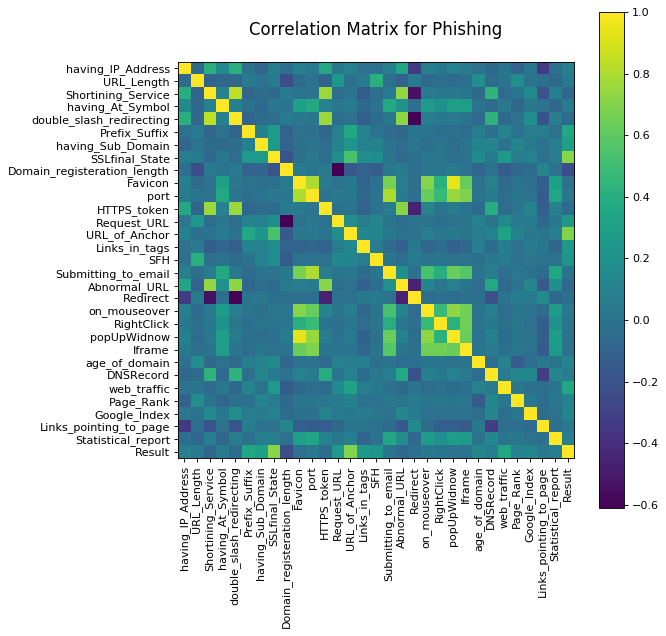

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    filename = "Phishing"
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(dataset, 8)

### Distribution graph of sampled Columns

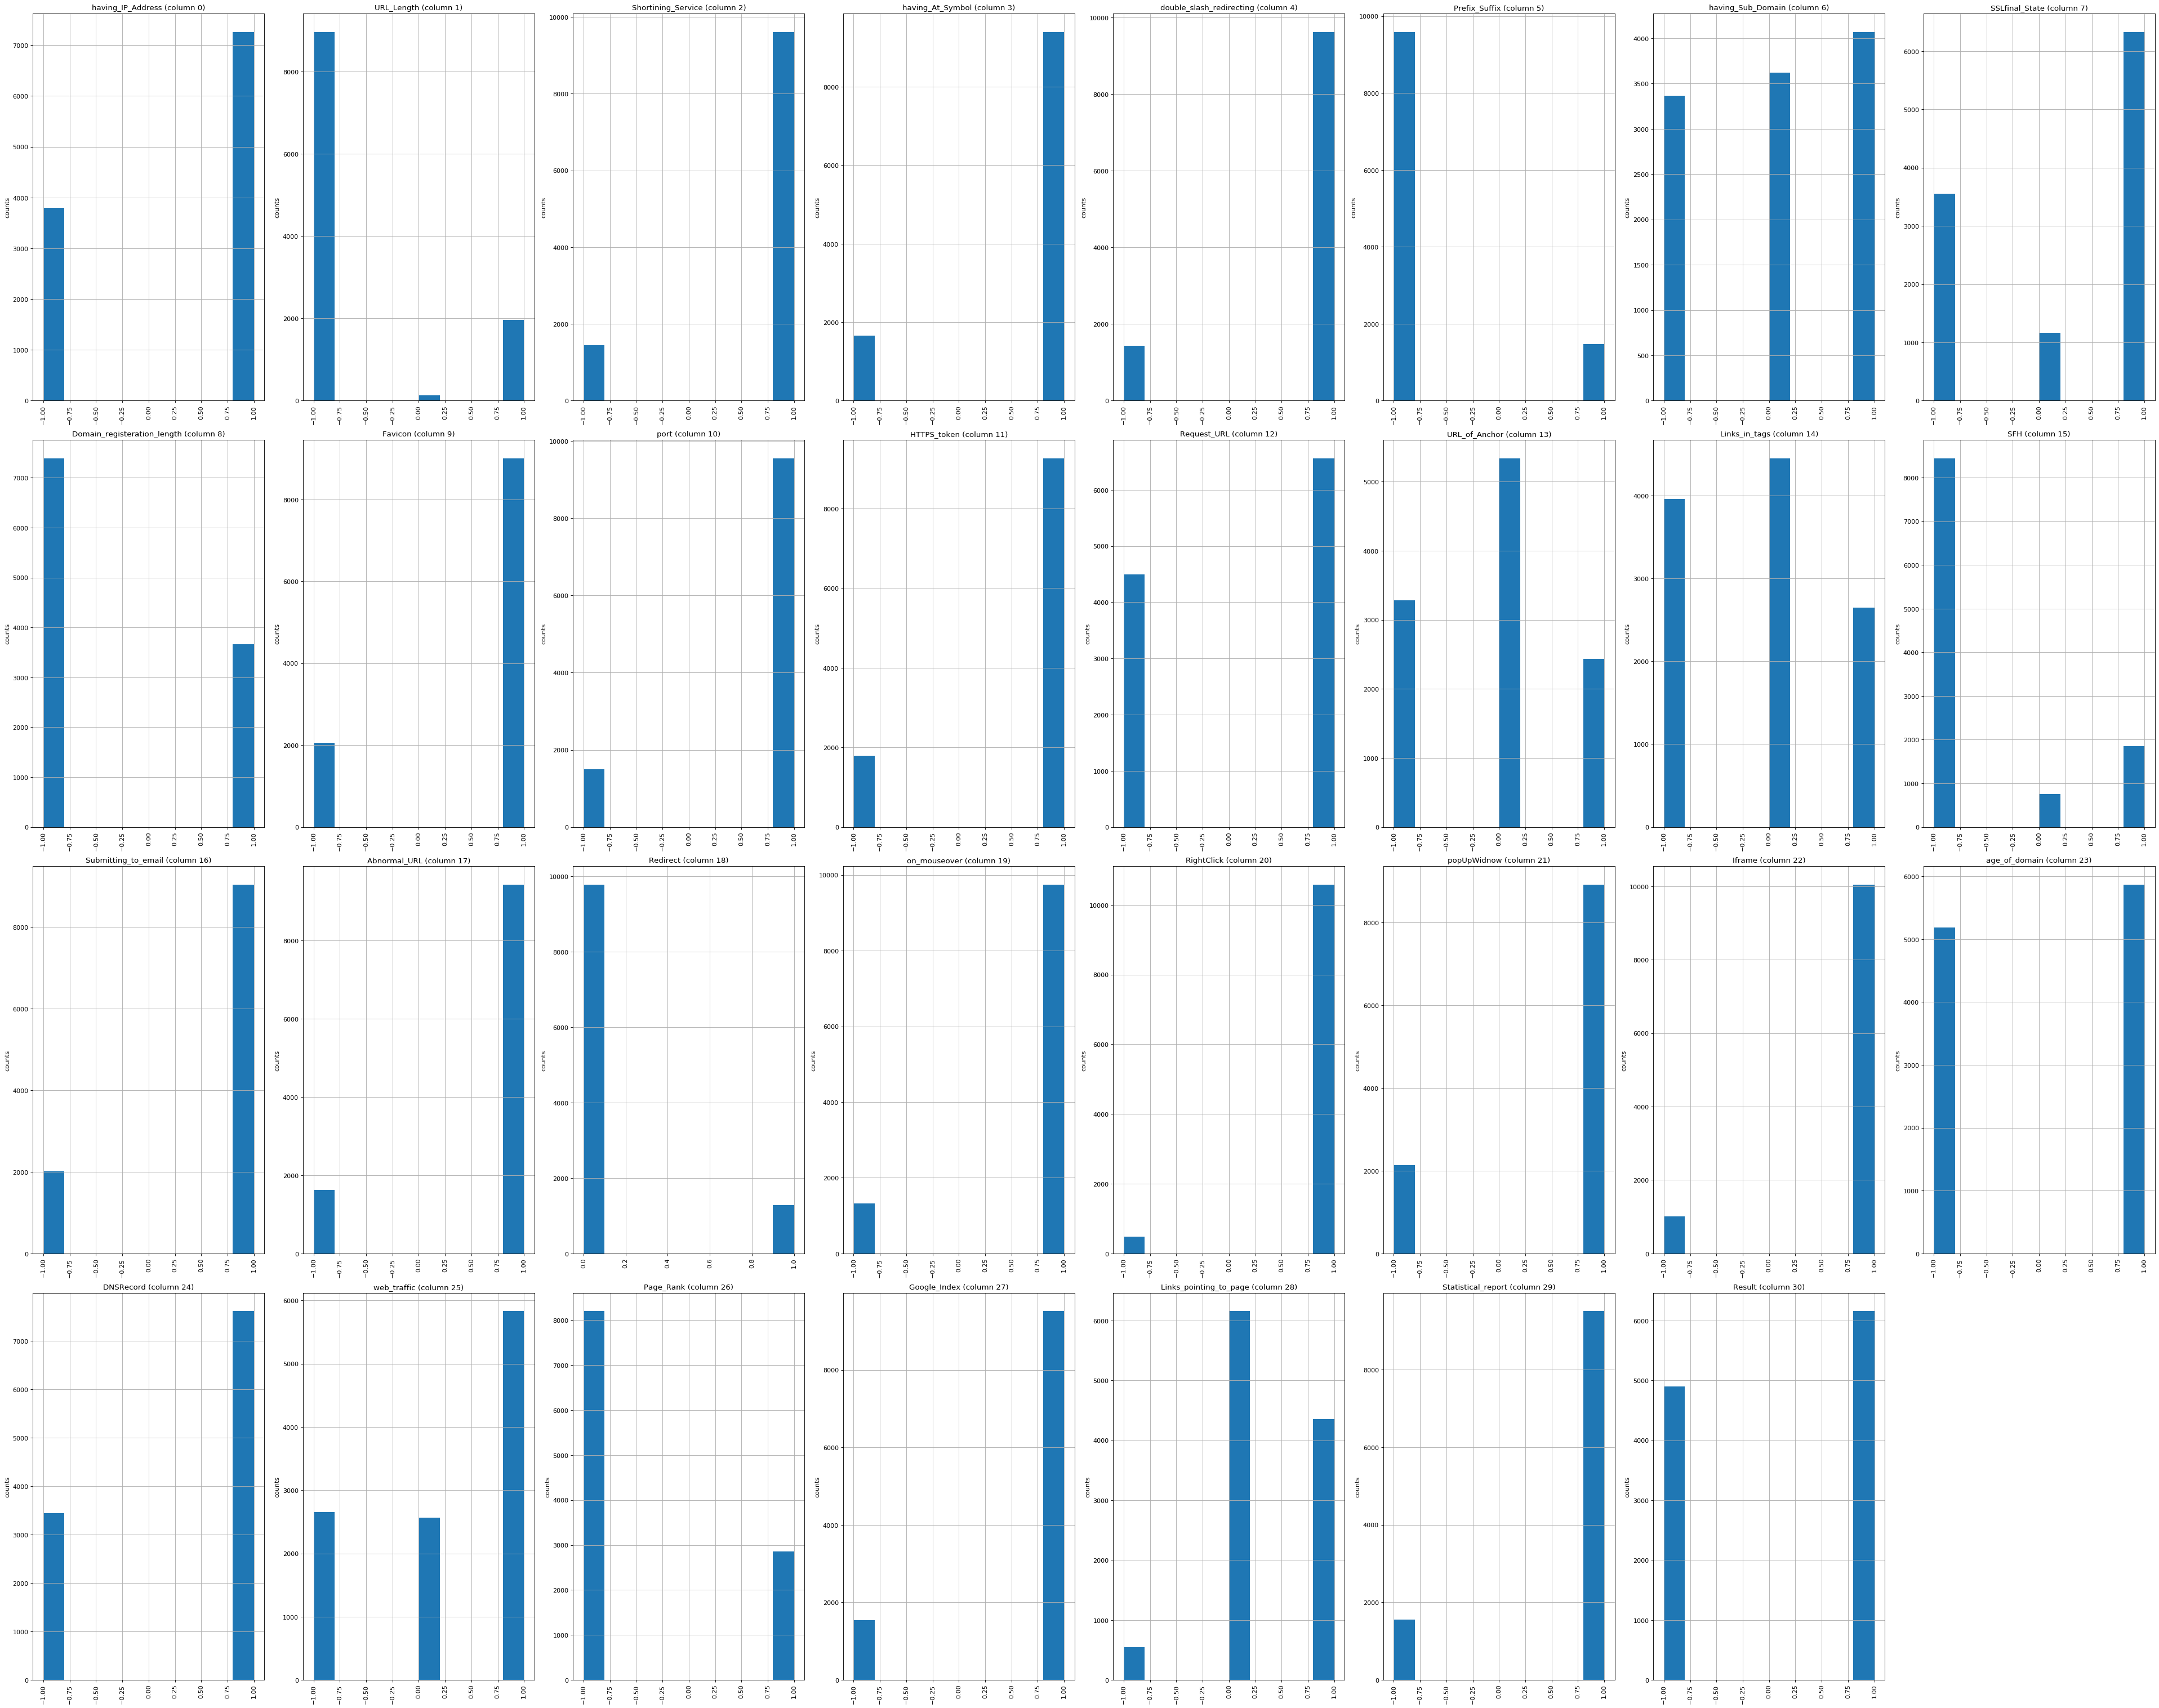

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(dataset, 32, 8)

### Splitting into Test and Train

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state =0 )


### Fitting Logistic Regression and Saving Model

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
if not os.path.exists("models/"):
  !mkdir models
joblib.dump(classifier, 'models/logistic.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['models/logistic.pkl']

### Fitting SVM and Saving Model

In [ ]:
parameters = [{'C':[1, 10, 100, 1000], 'gamma': [ 0.1, 0.2,0.3, 0.5]}]
grid_search = GridSearchCV(SVC(kernel='rbf' ),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)

classifier = SVC(C=1000, kernel = 'rbf', gamma = 0.2 , random_state = 10)
classifier.fit(x_train, y_train)

joblib.dump(classifier, 'models/svm.pkl')

### Fitting Random Forest and Saving Model

In [ ]:
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)

classifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 10)
classifier.fit(x_train, y_train)

joblib.dump(classifier, 'models/rf.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


['models/rf.pkl']

### Fitting Adaboost and Saving Model

In [ ]:
classifier = AdaBoostClassifier(n_estimators=100, random_state=10)
classifier.fit(x_train, y_train)

joblib.dump(classifier, 'models/ada.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['models/ada.pkl']

### Adding KNN and Saving Model

> Finding Accuracy for various values of K and using the one with most accuracy with values greater than 2 as with values less than 2 can be sensitive to noise



In [ ]:
knn=KNeighborsClassifier()
k_range=list(range(1,25))
k_scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn, x_train,y_train,cv=10,scoring='precision')
  k_scores.append(scores.mean())
print(np.round(k_scores,4))
plt.plot(k_range,k_scores,color="blue")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

num_neighbour = 1
temp=0.0
for i in range(3,25):
  if(k_scores[i-1]>temp):
    temp=k_scores[i-1]
    num_neighbour = i

print("Selected value of K: ",num_neighbour)

classifier = KNeighborsClassifier(n_neighbors=num_neighbour)
classifier.fit(x_train, y_train)

joblib.dump(classifier, 'models/knn.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when

### Importing Models and making Predictions

In [ ]:
Random_forest_model = joblib.load("models/rf.pkl")
Logistic_Regression_Model = joblib.load("models/logistic.pkl")
SVM_model = joblib.load("models/svm.pkl")
ADA_model = joblib.load("models/ada.pkl")
KNN_model = joblib.load("models/knn.pkl")

rf_predicted = Random_forest_model.predict(x_test)
lr_predicted = Logistic_Regression_Model.predict(x_test)
SVM_predicted = SVM_model.predict(x_test)
ADA_predicted = ADA_model.predict(x_test)
KNN_predicted = KNN_model.predict(x_test)

### Printing Confusion Matrixes

In [ ]:
def display_confussion(name,y_pred):
  c_m = confusion_matrix(y_test, y_pred)
  ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
  plt.colorbar(ax)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(name)
  plt.show()
  print("Accuracy Achieved for " +name+ ": ",((c_m[0][0]+c_m[1][1])/(c_m[0][0]+c_m[0][1]+c_m[1][0]+c_m[1][1]))*100," %" )
  print(classification_report(y_test,y_pred))
  print()

display_confussion("Adaboost",ADA_predicted)
display_confussion("Logistic Regression", lr_predicted)
display_confussion("SVM", SVM_predicted)
display_confussion("Random Forest", rf_predicted)
display_confussion("KNN (K=4)", KNN_predicted)